✅ R² Score: 0.9344
✅ Mean Squared Error (MSE): 157307752.38
✅ Mean Absolute Error (MAE): 8871.42


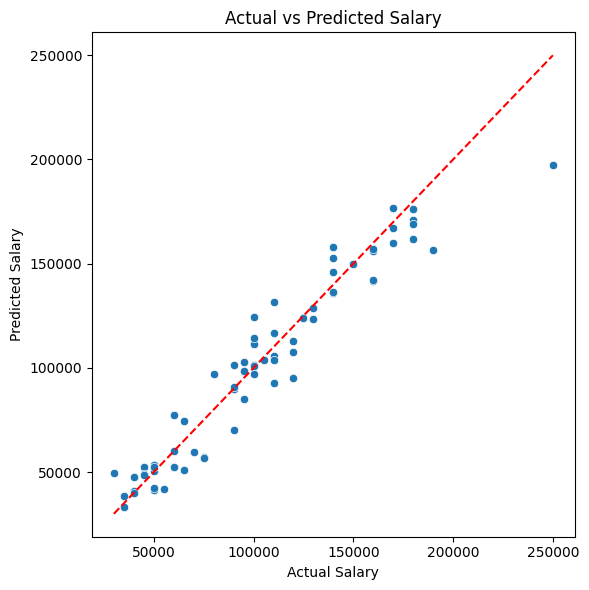

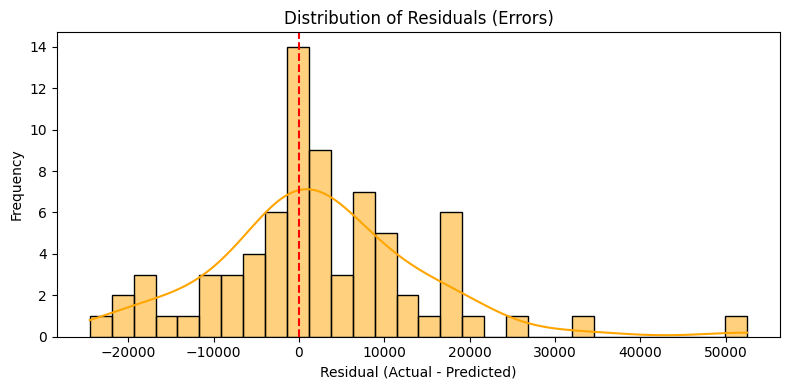

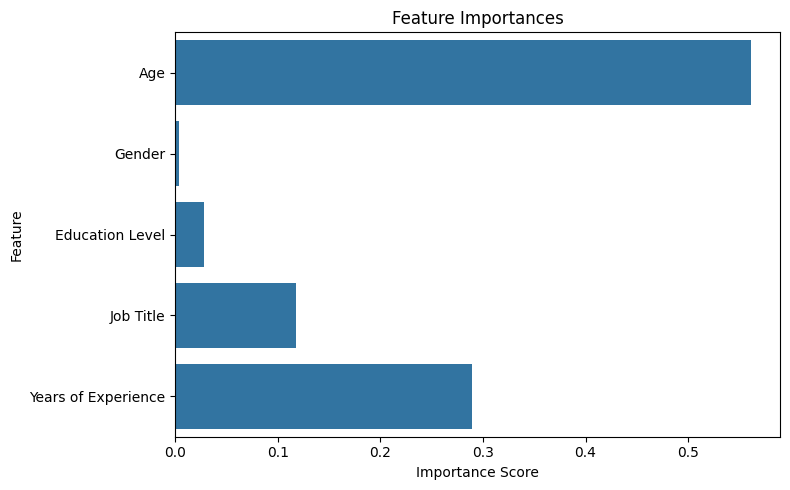

✅ Model and encoders saved successfully.


In [1]:
# 📌 1. Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# 📌 2. Load and Clean Data
df = pd.read_csv("/Users/komalkumari/Downloads/Salary Data.csv")
df.columns = df.columns.str.strip()
df.dropna(subset=['Salary'], inplace=True)
df.dropna(how='all', inplace=True)
df.reset_index(drop=True, inplace=True)

# 📌 3. Encode Categorical Features
label_encoders = {}
for col in ['Gender', 'Education Level', 'Job Title']:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# 📌 4. Feature Matrix and Target
X = df.drop("Salary", axis=1)
y = df["Salary"]

# 📌 5. Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 📌 6. Model Training
model = RandomForestRegressor(n_estimators=200, max_depth=10, random_state=42)
model.fit(X_train, y_train)

# 📌 7. Prediction & Accuracy Metrics
y_pred = model.predict(X_test)

r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f"✅ R² Score: {r2:.4f}")
print(f"✅ Mean Squared Error (MSE): {mse:.2f}")
print(f"✅ Mean Absolute Error (MAE): {mae:.2f}")

# 📌 8. Plot 1: Actual vs Predicted
plt.figure(figsize=(6, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Perfect line
plt.xlabel("Actual Salary")
plt.ylabel("Predicted Salary")
plt.title("Actual vs Predicted Salary")
plt.tight_layout()
plt.show()

# 📌 9. Plot 2: Residuals Plot
residuals = y_test - y_pred
plt.figure(figsize=(8, 4))
sns.histplot(residuals, bins=30, kde=True, color='orange')
plt.axvline(0, color='red', linestyle='--')
plt.title("Distribution of Residuals (Errors)")
plt.xlabel("Residual (Actual - Predicted)")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

# 📌 10. Plot 3: Feature Importance
plt.figure(figsize=(8, 5))
importances = model.feature_importances_
features = X.columns
sns.barplot(x=importances, y=features)
plt.title("Feature Importances")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

# 📌 11. Save Model and Encoders
with open("salary_model.pkl", "wb") as f:
    pickle.dump(model, f)

with open("label_encoders.pkl", "wb") as f:
    pickle.dump(label_encoders, f)

print("✅ Model and encoders saved successfully.")
